In [2]:
# import Library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import seaborn as sns
%matplotlib inline

Passos:<br>
<ul>
    <li>`[1] Análise/Estatística Descritiva`
        <ul>
            <li>`[1.1] Dimensao da base (linhas e colunas)`</li>
            <li>`[1. ] Entendendo as variaveis categoricas!`
                <ul>
                    <li>`count`</li>
                    <li>`frequency`</li>
                    <li>`tranformation`
                        <ul>
                            <li>`[convert to number]: label enconder/range value (mean, max/min)`</li>
                            <li>`[combine levels]: according to frequency/response rate`</li>
                            <li>`[dummy]: create multiples binary columns`</li> 
                        </ul>
                    </li>
                </ul>
            </li>
            <br>
            <li>`[1.2] Medida resumo das variaveis (head e summary equivalent in R`)</li>
            <li>`[1.3] 1% 5% 10% [25%] [50%] [75%] 90% 95% 99%`</li>
            <li>`[1.4] Distribuicao das variaveis (hist e bloxplot)`</li>
            <li>`[1.5] Missing e outliers`</li>
            <li>`[1.6] Correlacao de Pearson`</li>
            <li>`[1.7] Analise Bivariada (scatterplot matrix)`</li>
        </ul>
    </li>
    <br>
    <li>`[2] Preparacao da base`
        <ul>
            <li>`[2.1] Missing values?`</li>
                <ul>
                    <li>`delete rows containing missing values`</li>
                    <li>`complete with the mean/mode`</li>
                </ul>
            <br>
            <li>`[2.2] Média zero`</li>
            <li>`[2.3] Distancia 1`</li>
        </ul>
    </li>
    <br>
    <li>`[3] Machine Learning`
        <ul>
            <li><b>`[3.1] Linear Models`
                <ul>
                    <li>`sklearn.linear_model.LinearRegression()`</li>
                    <li>`sklearn.linear_model.Ridge()`</li>
                    <li>`sklearn.linear_model.Lasso()`</li>
                    <li>`sklearn.linear_model.LogisticRegression()`</li>
                    <li>`sklearn.svm.LinearSVC()`</li>
                </ul>
                </b>
            <br>
            </li>
            <li><b>`[3.2] Nearest Neighbors`
                <ul>
                    <li>`sklearn.neighbors.KNeighborsClassifier()`</li>
                    <li>`sklearn.neighbors.KNeighborsRegressor()`</li>
                </ul>
                </b>
            </li>    
            <li><b>`[3.3] Naive Bayes (classification only)`</b></li>
            <li><b>`[3.4] Decision trees`</b></li>
            <li><b>`[3.5] Random forests`</b></li>
            <li><b>`[3.6] Gradient Boosted Decision Trees`</b></li>
            <li><b>`[3.7] SVMs`</b></li>
            <li><span style="color:blue">[3.8] Neural Network (MLP)</span></li>
        </ul>
    </li>
    <br>
    <li>`[4] PCA (redução da dimensionalidade)`
        <ul>
        </ul>
    </li>
    <li>`[5] Cross-Validation`
        <ul>
        </ul>
    </li>
</ul>


# [1] Análise Descritiva

Importar o dataset de classificação das flores Iris, esse exemplo é como se fosse o print("Hello World") de Machine Learning

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

A variável iris_dataset é basicamente um objeto do tipo dicionário que contém os dados do dataset iris e alguns metadados. Como o dataset iris_dataset é rotulado, ou seja, contém os dados de classe para cada instância, podemos visualizar os dados das instâncias e as classes através dos métodos data e target.

In [4]:
print("Keys of iris_dataset: {}".format(iris_dataset.keys()))

Keys of iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [5]:
print(iris_dataset['DESCR'][:512] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

...


In [6]:
print("Feature names: {}".format(iris_dataset['feature_names']))
print("Target names: {}".format(iris_dataset['target_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [7]:
print("Type of data: {}".format(type(iris_dataset['data'])))
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of data: <class 'numpy.ndarray'>
Type of target: <class 'numpy.ndarray'>


### [1.1] Dimensão da base

In [8]:
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of data: (150, 4)
Shape of target: (150,)


### [1.2] Head

In [9]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

First five rows of data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [10]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### [1.3] Sumary

In [11]:
df = pd.DataFrame(data=iris_dataset['data'], columns=iris_dataset['feature_names'])
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df2 = pd.DataFrame(columns=(df.keys()))
df2.loc['dispersao (max - min)'] = list(df.quantile(q=1) - df.quantile(q=0))
df2.loc['dispersao (75% - 25%)'] = list(df.quantile(q=0.75) - df.quantile(q=0.25))
df2.loc['min'] = list(df.quantile(q=0))
df2.loc['1%'] = list(df.quantile(q=0.01))
df2.loc['5%'] = list(df.quantile(q=0.05))
df2.loc['10%'] = list(df.quantile(q=0.1))
df2.loc['25%'] = list(df.quantile(q=0.25))
df2.loc['median'] = list(df.quantile(q=0.5))
df2.loc['75%'] = list(df.quantile(q=0.75))
df2.loc['90%'] = list(df.quantile(q=0.9))
df2.loc['95%'] = list(df.quantile(q=0.95))
df2.loc['99%'] = list(df.quantile(q=0.99))
df2.loc['max'] = list(df.quantile(q=1))
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
dispersao (max - min),3.600,2.400,5.900,2.4
dispersao (75% - 25%),1.300,0.500,3.500,1.5
min,4.300,2.000,1.000,0.1
1%,4.400,2.200,1.149,0.1
5%,4.600,2.345,1.300,0.2
10%,4.800,2.500,1.400,0.2
25%,5.100,2.800,1.600,0.3
median,5.800,3.000,4.350,1.3
75%,6.400,3.300,5.100,1.8
90%,6.900,3.610,5.800,2.2


### [1.5] Missing values

In [13]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### [1.6] Correlação de Pearson

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


A covariância é uma medida numérica que indica a inter-dependência entre duas variáveis.
Ela indica como duas variáveis se comportam conjuntamente em relação às suas médias.
Uma covariância igual a 0 indica que as duas variáveis são totalmente independentes,
enquanto que uma covariância alta e positiva indica que uma variável é grande quando a outra é grande.
<br><br>
A covariância, entretanto, pode ser difícil de ser compreendida e comparada,
pois ela nos dá valores em escalas que serão diferentes conforme as variáveis mudem.

In [15]:
df.cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.039268,1.273682,0.516904
sepal width (cm),-0.039268,0.188004,-0.321713,-0.117981
petal length (cm),1.273682,-0.321713,3.113179,1.296387
petal width (cm),0.516904,-0.117981,1.296387,0.582414


A correlação também é outra medida que indica o quanto duas variáveis estão relacionadas. Seu valor fica sempre entre -1, que indica uma anti-correlação perfeita, e 1, que indica uma correlação perfeita.

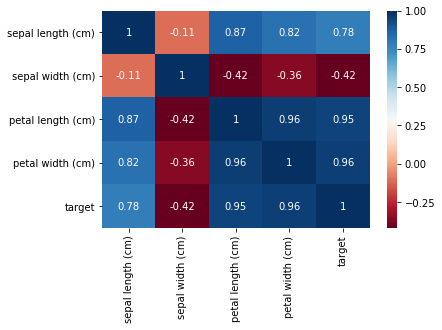

In [16]:
df['target'] = iris_dataset['target']
sns.heatmap(df.corr(), annot = True, cmap = "RdBu" )

#### Lembre-se: correlação não implica causalidade

### Histograms of each feature

Text(0.5,0.98,'Iris histograms')

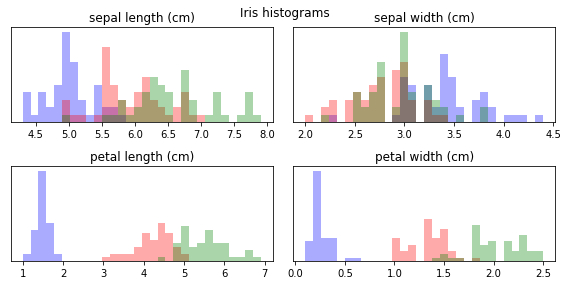

In [56]:
fig, axes = plt.subplots(2,2,figsize=(8,4))

setosa = iris_dataset.data[iris_dataset.target == 0]
versicolor = iris_dataset.data[iris_dataset.target == 1]
virginica = iris_dataset.data[iris_dataset.target == 2]

ax = axes.ravel()

for i in range(4):
    _, bins = np.histogram(iris_dataset.data[:,i], bins = 30)
    ax[i].hist(setosa[:,i], bins = bins, color = 'b', alpha = 0.333)
    ax[i].hist(versicolor[:,i], bins = bins, color = 'r', alpha = 0.333)
    ax[i].hist(virginica[:,i], bins = bins, color = 'g', alpha = 0.333)
    
    ax[i].set_title(iris_dataset.feature_names[i])
    ax[i].set_yticks(())
fig.tight_layout()
plt.suptitle("Iris histograms")

### [1.7] Análise Bivariada (scatterplot matrix)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BECC198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CB7CE48>]], dtype=object)

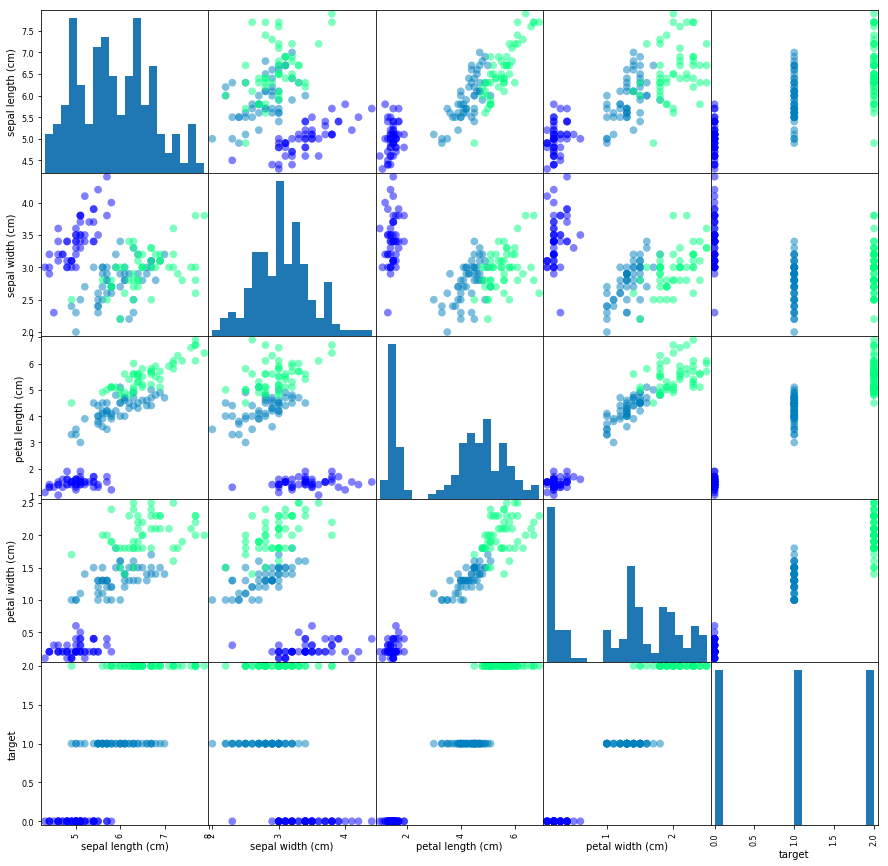

In [17]:
pd.plotting.scatter_matrix(df
                           , c=iris_dataset['target']
                           , figsize=(15, 15)
                           , marker='o'
                           , hist_kwds={'bins': 20}
                           , s=60
                           , cmap='winter')

In [18]:
from mpl_toolkits.mplot3d import Axes3D

In [19]:
def corr3d(i,j,k):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.scatter(df[df.columns[i]]
                   , df[df.columns[j]]
                   , df[df.columns[k]]
                   , zdir='z'
                   , s=20
                   , c=iris_dataset['target']
                   , cmap='winter')

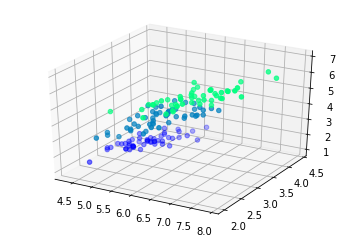

In [20]:
corr3d(0,1,2)

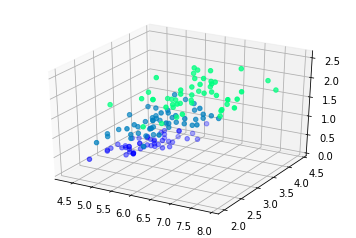

In [21]:
corr3d(0,1,3)

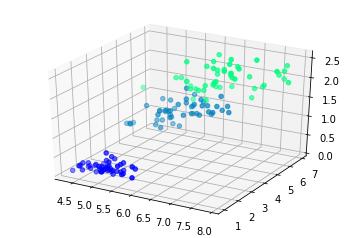

In [22]:
corr3d(0,2,3)

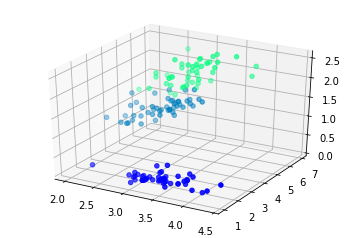

In [23]:
corr3d(1,2,3)

# Pre-processing Data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [24]:
print("Shape of train data: {}".format(X_train.shape))
print("Shape of test data: {}".format(X_test.shape))
print("Shape of target data: {}".format(y_train.shape))
print("Shape of target test: {}".format(y_test.shape))

Shape of train data: (112, 4)
Shape of test data: (38, 4)
Shape of target data: (112,)
Shape of target test: (38,)


Text(0.5,1,'Test data')

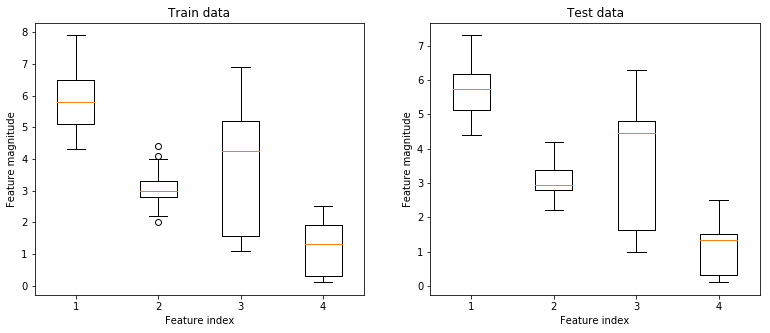

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].boxplot(X_train)
#plt.yscale("symlog")
axes[0].set_xlabel("Feature index")
axes[0].set_ylabel("Feature magnitude")
axes[0].set_title("Train data")

axes[1].boxplot(X_test)
#plt.yscale("symlog")
axes[1].set_xlabel("Feature index")
axes[1].set_ylabel("Feature magnitude")
axes[1].set_title("Test data")

In [25]:
from sklearn import preprocessing

In [26]:
def print_mean_std_min_max(x):
    print("Média: {}".format(x.mean(axis=0).round(decimals=5)))
    print("Std:   {}".format(x.std(axis=0).round(decimals=5)))
    print("Min:   {}".format(x.min(axis=0).round(decimals=5)))
    print("Max:   {}".format(x.max(axis=0).round(decimals=5)))

### StandardScaler()

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In [27]:
scaler_stnd = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler_stnd.transform(X_train)
X_test_scaled = scaler_stnd.transform(X_test)

X_train_scaled[:5].round(decimals=5)

array([[ 0.01544, -0.11925,  0.22513,  0.35638],
       [-0.09985, -1.04039,  0.11356, -0.02865],
       [ 1.053  , -0.11925,  0.95031,  1.12644],
       [-1.36798,  0.34132, -1.3926 , -1.31208],
       [ 1.16829,  0.11103,  0.72718,  1.38313]])

In [28]:
print_mean_std_min_max(X_train_scaled)
print()
print_mean_std_min_max(X_test_scaled)

Média: [ 0. -0.  0.  0.]
Std:   [ 1.  1.  1.  1.]
Min:   [-1.82912 -2.42211 -1.50417 -1.44042]
Max:   [ 2.32114  3.10474  1.73129  1.63981]

Média: [-0.19693  0.02013 -0.08315 -0.11984]
Std:   [ 0.77269  0.98064  0.91981  0.89643]
Min:   [-1.71383 -1.96154 -1.55995 -1.44042]
Max:   [ 1.62943  2.64417  1.39658  1.63981]


Text(0,0.5,'Feature magnitude')

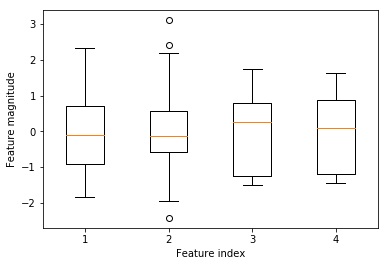

In [67]:
plt.boxplot(X_train_scaled)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

### MinMaxScaler()

Scaling features to a range.<br>
An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. 

In [29]:
scaler_minmax = preprocessing.MinMaxScaler().fit(X_train)
X_train_scaled_0_1 = scaler_minmax.transform(X_train)
X_test_scaled_0_1 = scaler_minmax.transform(X_test)

X_train_scaled_0_1[:5].round(decimals=5)

array([[ 0.44444,  0.41667,  0.53448,  0.58333],
       [ 0.41667,  0.25   ,  0.5    ,  0.45833],
       [ 0.69444,  0.41667,  0.75862,  0.83333],
       [ 0.11111,  0.5    ,  0.03448,  0.04167],
       [ 0.72222,  0.45833,  0.68966,  0.91667]])

In [30]:
print_mean_std_min_max(X_train_scaled_0_1)
print()
print_mean_std_min_max(X_test_scaled_0_1)

Média: [ 0.44072  0.43824  0.4649   0.46763]
Std:   [ 0.24095  0.18094  0.30908  0.32465]
Min:   [ 0.  0.  0.  0.]
Max:   [ 1.  1.  1.  1.]

Média: [ 0.39327  0.44189  0.4392   0.42873]
Std:   [ 0.18618  0.17743  0.28429  0.29102]
Min:   [ 0.02778  0.08333 -0.01724  0.     ]
Max:   [ 0.83333  0.91667  0.89655  1.     ]


Text(0,0.5,'Feature magnitude')

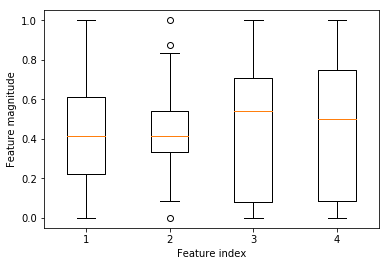

In [68]:
plt.boxplot(X_train_scaled_0_1)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

# Machine Learning

## - UNSUPERVISED LEARNING

### PCA (redução da dimensionalidade)

## - SUPERVISED LEARNING

## [ ] k-nn - RESUMO 1

Um teste rápido usando K-nn com 3 vizinhos, e vendo sua acurácia para esse teste

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

x_pred = knn.predict(X_train)
y_pred = knn.predict(X_test)

print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [33]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
print("Test set score: {:.2f}".format(knn.score(X_train, y_train)))

Test set score: 0.97
Test set score: 0.96


## [ ] k-nn

Um gráfico mostrando a acurácia do teste para diferentes números de vizinhos

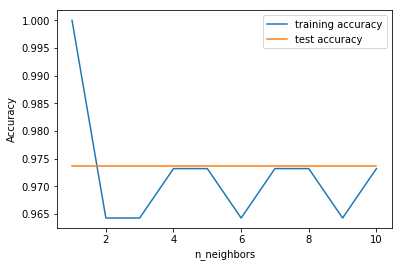

In [34]:
training_accuracy = []
test_accuracy = []

for n_neighbors in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    training_accuracy.append(knn.score(X_train, y_train)) # record training set accuracy
    test_accuracy.append(knn.score(X_test, y_test)) # record generalization accuracy
    
plt.plot(range(1, 11), training_accuracy, label="training accuracy")
plt.plot(range(1, 11), test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## [ ] Linear Regression - ERRADO
### pois queremos classificar e nao fazer regressao!

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print("lr.coef_: %s" % lr.coef_)
print("lr.intercept_: %s" % lr.intercept_)

lr.coef_: [-0.15335593 -0.0256293   0.26759594  0.57153645]
lr.intercept_: 0.302165422189


In [37]:
print("Train set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Train set score: 0.94
Test set score: 0.89


In [38]:
pd.DataFrame([lr.predict(X_test), y_test], ["predicted", "value"]) 

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
predicted,2.077366,0.967566,-0.159994,1.822962,-0.036053,2.285863,-0.034981,1.310235,1.272195,1.108313,...,0.931041,0.105014,1.74178,1.458642,-0.069287,1.629792,2.004843,1.279291,-0.042981,1.592028
value,2.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.00000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000


## [ ] Regressão Logistica / SVC

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lor = LogisticRegression(C=0.001).fit(X_train, y_train)
print("Train set score: {:.2f}".format(lor.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lor.score(X_test, y_test)))
print()

lor = LogisticRegression(C=1).fit(X_train, y_train)
print("Train set score: {:.2f}".format(lor.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lor.score(X_test, y_test)))
print()

lor = LogisticRegression(C=100).fit(X_train, y_train)
print("Train set score: {:.2f}".format(lor.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lor.score(X_test, y_test)))
print()

Train set score: 0.37
Test set score: 0.24

Train set score: 0.95
Test set score: 0.87

Train set score: 0.99
Test set score: 0.97



In [41]:
lor = LogisticRegression(penalty = 'l1',C=0.001).fit(X_train, y_train)
print("Train set score: {:.2f}".format(lor.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lor.score(X_test, y_test)))
print()

lor = LogisticRegression(penalty = 'l1',C=1).fit(X_train, y_train)
print("Train set score: {:.2f}".format(lor.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lor.score(X_test, y_test)))
print()

lor = LogisticRegression(penalty = 'l1',C=100).fit(X_train, y_train)
print("Train set score: {:.2f}".format(lor.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lor.score(X_test, y_test)))
print()

Train set score: 0.33
Test set score: 0.34

Train set score: 0.97
Test set score: 0.89

Train set score: 0.99
Test set score: 0.97



In [42]:
from sklearn.svm import LinearSVC

In [43]:
lsvc = LinearSVC(C=0.001).fit(X_train, y_train)
print("Train set score: {:.2f}".format(lsvc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lsvc.score(X_test, y_test)))
print()

lsvc = LinearSVC(C=1).fit(X_train, y_train)
print("Train set score: {:.2f}".format(lsvc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lsvc.score(X_test, y_test)))
print()

lsvc = LinearSVC(C=100).fit(X_train, y_train)
print("Train set score: {:.2f}".format(lsvc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lsvc.score(X_test, y_test)))
print()

Train set score: 0.70
Test set score: 0.58

Train set score: 0.98
Test set score: 0.92

Train set score: 0.95
Test set score: 0.92



## [ ] Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB    # Continuos Data
from sklearn.naive_bayes import BernoulliNB   # Binary Data      --.
from sklearn.naive_bayes import MultinomialNB # Count Data       ---`-> most used for text data classification

In [45]:
nv = GaussianNB().fit(X_train, y_train)
print("Train set score: {:.2f}".format(nv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(nv.score(X_test, y_test)))
print()

Train set score: 0.95
Test set score: 1.00



## [3.4] Decision trees

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
def plot_feature_importances_cancer(model):
    n_features = iris_dataset['data'].shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris_dataset['feature_names'])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

OVERFITED!

In [48]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.974


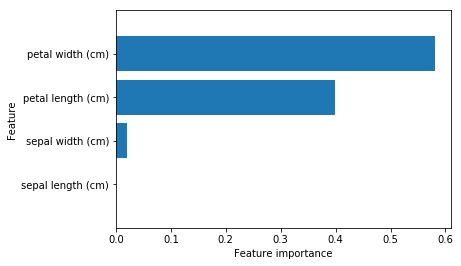

In [49]:
plot_feature_importances_cancer(tree)

In [50]:
tree = DecisionTreeClassifier(max_depth = 3, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.982
Accuracy on test set: 0.974


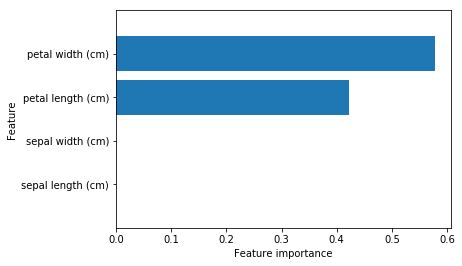

In [51]:
plot_feature_importances_cancer(tree)

### [3.5] Random forests

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.974


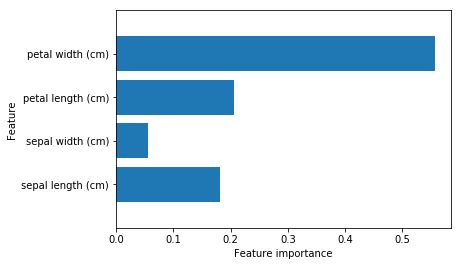

In [54]:
plot_feature_importances_cancer(forest)

In [55]:
forest = RandomForestClassifier(n_estimators=50, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.974


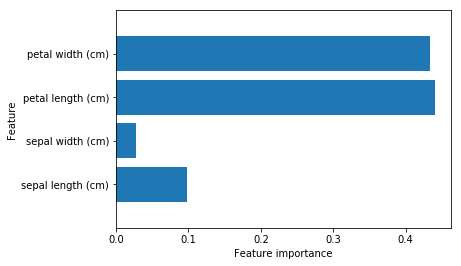

In [56]:
plot_feature_importances_cancer(forest)

### [ ] Gradient Boosted Regression Trees (Gradient Boosting Machines)

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
# n_estimators  (default=100)
# max_depth     (default=3)
# learning_rate (default=0.1)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.974


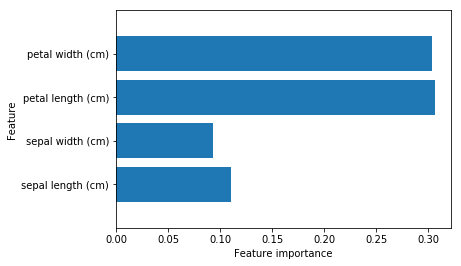

In [59]:
plot_feature_importances_cancer(gbrt)

Queremos GENERALIZAR o nosso modelo, podemos diminuir o max_depth ou o learning_rate

In [60]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.974


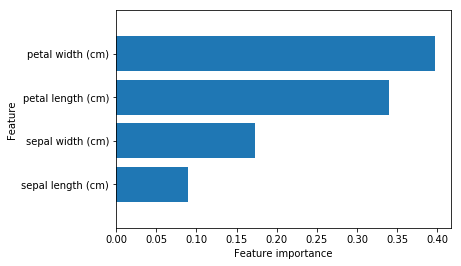

In [61]:
plot_feature_importances_cancer(gbrt)

In [62]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.974


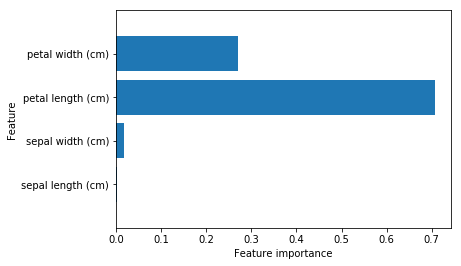

In [63]:
plot_feature_importances_cancer(gbrt)

Neste caso a base é pequena demais para conseguir uma generalizacao usando este modelo

### SVMs

In [64]:
from sklearn.svm import SVC

In [65]:
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.97


In [69]:
for c in [.1,1,1000]:
    for g in [.1,1,10]:
        svc = SVC(C=c, gamma=g)
        svc.fit(X_train_scaled_0_1, y_train)
        print("C = "+str(c)+" gamma = "+ str(g))
        print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled_0_1, y_train)))
        print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled_0_1, y_test)))
        print()

C = 0.1 gamma = 0.1
Accuracy on training set: 0.63
Accuracy on test set: 0.47

C = 0.1 gamma = 1
Accuracy on training set: 0.89
Accuracy on test set: 0.87

C = 0.1 gamma = 10
Accuracy on training set: 0.95
Accuracy on test set: 0.97

C = 1 gamma = 0.1
Accuracy on training set: 0.93
Accuracy on test set: 0.87

C = 1 gamma = 1
Accuracy on training set: 0.97
Accuracy on test set: 0.97

C = 1 gamma = 10
Accuracy on training set: 0.96
Accuracy on test set: 0.97

C = 1000 gamma = 0.1
Accuracy on training set: 0.99
Accuracy on test set: 0.97

C = 1000 gamma = 1
Accuracy on training set: 1.00
Accuracy on test set: 0.97

C = 1000 gamma = 10
Accuracy on training set: 1.00
Accuracy on test set: 0.97



### [ ] Neural Networks (Deep Learning) - Introduction

In [70]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [87]:
mlp = MLPClassifier(max_iter=1000, alpha = 1, random_state=42)
mlp.fit(X_train_scaled_0_1, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train_scaled_0_1, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test_scaled_0_1, y_test)))

Accuracy on training set: 0.96
Accuracy on test set: 0.97


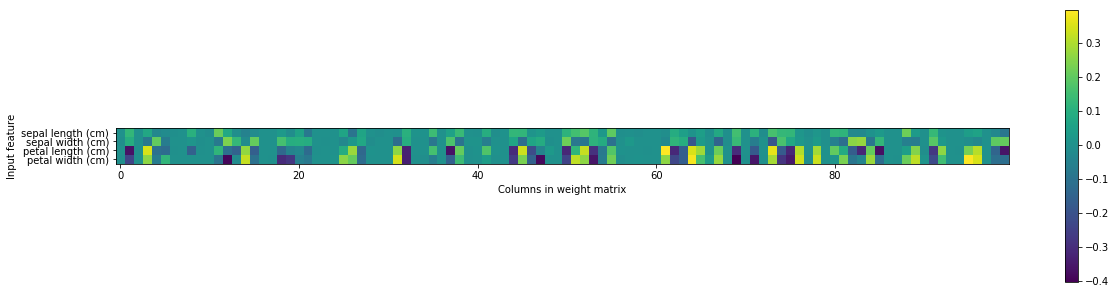

In [94]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(4), iris_dataset['feature_names'])
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()